In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.polynomial.polynomial as poly
import glob
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_flat_phiextremes_n100_r10', 'rb')
agg_as_flatx, agg_bs_flatx, agg_cs_flatx, phi2Ds_flatx, cplxs_flatx, dds_flatx = pickle.load(f)

In [ ]:
f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_plates', 'rb')
array_plates = pickle.load(f)
agg_as_plates_flat = array_plates['agg_as']
agg_bs_plates_flat = array_plates['agg_bs']
agg_cs_plates_flat = array_plates['agg_cs']
phi2Ds_plates_flat = array_plates['phi2Ds']
cplxs_plates_flat = array_plates['cplxs']
dds_plates_flat = array_plates['dds']

f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_columns', 'rb')
array_columns = pickle.load(f)
agg_as_columns_flat = array_columns['agg_as']
agg_bs_columns_flat = array_columns['agg_bs']
agg_cs_columns_flat = array_columns['agg_cs']
phi2Ds_columns_flat = array_columns['phi2Ds']
cplxs_columns_flat = array_columns['cplxs']
dds_columns_flat = array_columns['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_plates_reproduce', 'rb')
array_plates = pickle.load(f)
agg_as_plates_rand = array_plates['agg_as']
agg_bs_plates_rand = array_plates['agg_bs']
agg_cs_plates_rand = array_plates['agg_cs']
phi2Ds_plates_rand = array_plates['phi2Ds']
cplxs_plates_rand = array_plates['cplxs']
dds_plates_rand = array_plates['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_columns_reproduce', 'rb')
array_columns = pickle.load(f)
agg_as_columns_rand = array_columns['agg_as']
agg_bs_columns_rand = array_columns['agg_bs']
agg_cs_columns_rand = array_columns['agg_cs']
phi2Ds_columns_rand = array_columns['phi2Ds']
cplxs_columns_rand = array_columns['cplxs']
dds_columns_rand = array_columns['dds']

In [4]:
f = open('../instance_files/instance_iceagg_rand_n150_a10_phi5_eqmajorax', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2D_rand, dds_rand = pickle.load(f)


f = open('../instance_files/instance_iceagg_flat_n100_a1000_allphi_eqmajorax', 'rb')
array = pickle.load(f)
agg_as_flat = array['agg_as']
agg_bs_flat = array['agg_bs']
agg_cs_flat = array['agg_cs']
phi2Ds_flat = array['phi2Ds']
cplxs_flat = array['cplxs']
dds_flat = array['dds']

In [ ]:
print(agg_as_rand.shape)

In [ ]:
agg_as_rand = np.concatenate((agg_as_plates_rand, agg_as_columns_rand))
agg_bs_rand = np.concatenate((agg_bs_plates_rand, agg_bs_columns_rand))
agg_cs_rand = np.concatenate((agg_cs_plates_rand, agg_cs_columns_rand))
phi2Ds_rand = np.concatenate((phi2Ds_plates_rand, phi2Ds_columns_rand))
cplxs_rand = np.concatenate((cplxs_plates_rand, cplxs_columns_rand))
dds_rand = np.concatenate((dds_plates_rand, dds_columns_rand))

agg_as_flat = np.concatenate((agg_as_plates_flat, agg_as_columns_flat))
agg_bs_flat = np.concatenate((agg_bs_plates_flat, agg_bs_columns_flat))
agg_cs_flat = np.concatenate((agg_cs_plates_flat, agg_cs_columns_flat))
phi2Ds_flat = np.concatenate((phi2Ds_plates_flat, phi2Ds_columns_flat))
cplxs_flat = np.concatenate((cplxs_plates_flat, cplxs_columns_flat))
dds_flat = np.concatenate((dds_plates_flat, dds_columns_flat))

In [6]:
phica_rand = agg_cs_rand/agg_as_rand
phica_flat = agg_cs_flat/agg_as_flat
phiba_rand = agg_bs_rand/agg_as_rand
phiba_flat = agg_bs_flat/agg_as_flat

In [7]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [15]:
Ns = np.arange(0,99,1)
phios = [0.01, 0.10, 1.0, 10.0, 100.0]

modes_rand_ba=[]
modes_rand_ca = []
modes_flat_ba=[]
modes_flat_ca=[]

for phio in range(len(phios)):    
    for N in Ns:
        data_rand = np.vstack([phiba_rand[phio,0,:,N], phica_rand[phio,0,:,N]])
        kde_rand = st.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[phio,:,:,N], phica_flat[phio,:,:,N]])
        kde_flat = st.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)

        #modes
        modes_rand_ba.append(np.where(Z_rand==np.max(Z_rand))[0]/100)
        modes_rand_ca.append(np.where(Z_rand==np.max(Z_rand))[1]/100)

        modes_flat_ba.append(np.where(Z_flat==np.max(Z_flat))[0]/100)
        modes_flat_ca.append(np.where(Z_flat==np.max(Z_flat))[1]/100)
        
#         if N == Ns[-1]:
#             print(N, phios[phio])
#             print('modes rand ba', np.where(Z_rand==np.max(Z_rand))[0]/100)
#             print('modes rand ca', np.where(Z_rand==np.max(Z_rand))[1]/100)
            #print('modes flat ba', np.where(Z_flat==np.max(Z_flat))[0]/100)
            #print('modes flat ca', np.where(Z_flat==np.max(Z_flat))[1]/100)
        


In [ ]:
def list_of_hex_colours(N, base_cmap):
    """
    Return a list of colors from a colourmap as hex codes

        Arguments:
            cmap: colormap instance, eg. cm.jet.
            N: number of colors.

        Author: FJC
    """
    cmap = plt.cm.get_cmap(base_cmap, N)

    hex_codes = []
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        hex_codes.append(mcolors.rgb2hex(rgb))
    return hex_codes 

In [ ]:
hex_codes = list_of_hex_colours(7,'Spectral')
hex_codes

In [ ]:
modes_flat_ba[:,98]

In [ ]:
modes_flat_ca[:,98]

In [ ]:
modes_flat_ba[:,98]

In [ ]:
modes_flat_ca[:,98]

In [14]:
np.shape(modes_flat_ba)

(0,)

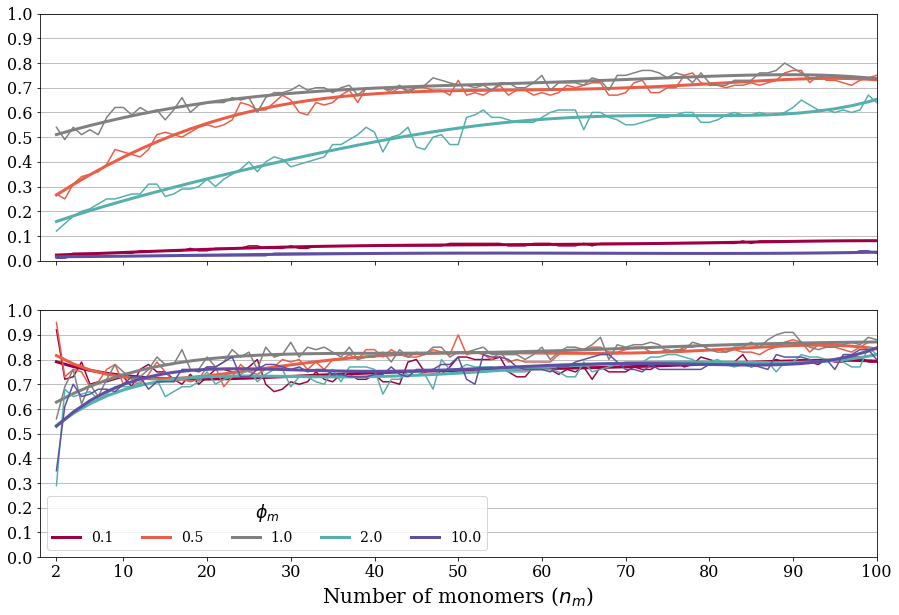

In [17]:
#eq major axis lengths
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Nm = 100
Ns = np.arange(0,Nm-1,1)
phios = [0,1,2,3,4]  
phio_labels = [0.1, 0.5, 1.0, 2.0, 10.0]
x_new = np.linspace(2, Nm+1)

#modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
#modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=1
Ns = np.arange(2,Nm+1,interval)
colors = ['#9e0142', '#ea5d47', '#fdbf6f', 'gray', '#bfe5a0', '#55afad', '#5e4fa2']
colors = ['#9e0142', '#ea5d47', 'gray', '#55afad', '#5e4fa2']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
#    axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])

    axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
    axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
#     axs[0].plot(Ns, modes_rand_ba[phi,::interval], '--', color=colors[phi])
#     axs[1].plot(Ns, modes_rand_ca[phi,::interval], '--', color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
#     coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], 5)
#     ffit = poly.polyval(x_new, coefs)
#    axs[0].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
#     coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], 5)
#     ffit = poly.polyval(x_new, coefs)
#     axs[1].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
plt.rcParams['legend.title_fontsize'] = 'xx-large'
#axs[0].legend(title='$\phi_m$', ncol=7);
axs[1].legend(title='$\phi_m$', ncol=7);

axs[0].set_xlim(0.0,Nm)
axs[1].set_xlim(0.0,Nm)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
#axs[0].set_ylabel('$\phi_{ca}$', fontsize=30)
#axs[1].set_ylabel('$\phi_{ba}$', fontsize=30)
axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[0].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])

#axs[1].xaxis.set_ticks([2,10,20,30,40,50])

axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')
#fig.savefig('../plots/N150_phi_asymptote_bestfit.png', bbox_inches='tight', dpi=300)


ValueError: cannot reshape array of size 495 into shape (7,99)

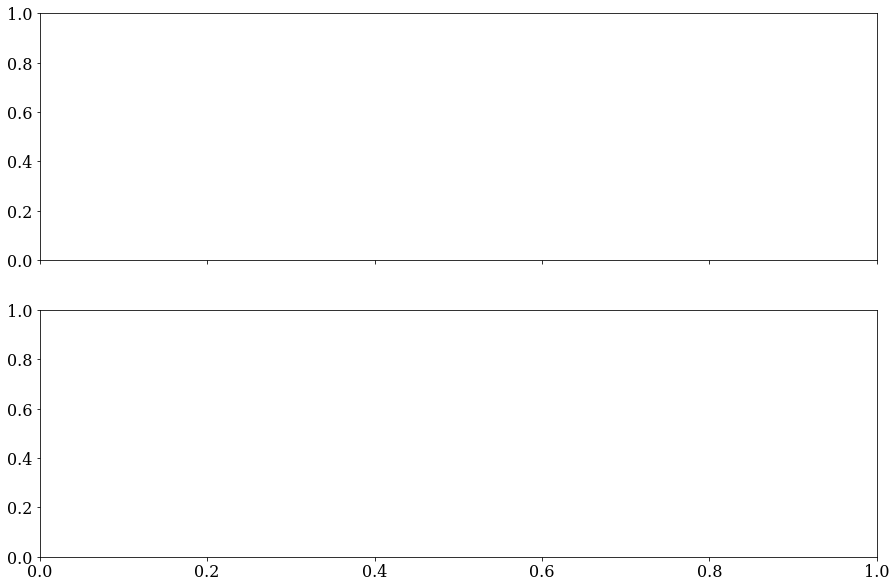

In [10]:
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Nm =100
Ns = np.arange(0,Nm-1,1)
phios = [0,1,2,3,4,5,6]  
phio_labels = [0.01, 0.10, 0.50, 1.0, 2.0, 10.0, 100.0]
x_new = np.linspace(2, Nm+1)

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))

modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=1
Ns = np.arange(2,Nm+1,interval)

colors = ['#9e0142', '#ea5d47', '#fdbf6f', 'gray', '#bfe5a0', '#55afad', '#5e4fa2']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
    #axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])

#     axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
#     axs[0].plot(Ns, modes_rand_ba[phi,::interval], '--', color=colors[phi])
#     axs[1].plot(Ns, modes_rand_ca[phi,::interval], '--', color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
    error = np.std(modes_flat_ba[phi,::interval])
    axs[0].fill_between(Ns, modes_flat_ba[phi,::interval]-error, modes_flat_ba[phi,::interval]+error, color=colors[phi], alpha =0.2)
    
    coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    error = np.std(modes_rand_ba[phi,::interval])
    axs[0].fill_between(Ns, modes_rand_ba[phi,::interval]-error, modes_rand_ba[phi,::interval]+error, color=colors[phi], alpha =0.2)

    
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    print(str(phio_labels[phi]))
    axs[1].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
    coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
plt.rcParams['legend.title_fontsize'] = 'xx-large'
#axs[0].legend(title='$\phi_m$', ncol=7);
axs[1].legend(title='$\phi_m$', ncol=7);

axs[0].set_xlim(0.0,Nm)
axs[1].set_xlim(0.0,Nm)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
#axs[0].set_ylabel('$\phi_{ca}$', fontsize=30)
#axs[1].set_ylabel('$\phi_{ba}$', fontsize=30)
axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[0].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
axs[1].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])

#axs[1].xaxis.set_ticks([2,10,20,30,40,50])

axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')
#fig.savefig('../plots/N150_phi_asymptote_bestfit.png', bbox_inches='tight', dpi=300)


In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Ns = np.arange(0,99,1)
phios = [0,2,3,4,6]  
phio_labels = [0.1, 0.5, 1.0, 2.0, 10.0]

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=2
Ns = np.arange(2,101,interval)

colors = ['#0077E0', 'green', 'k', 'red', 'orange']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
#     axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, color=colors[phi], label=str(phio_labels[phi]))
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linestyle='--', color=colors[phi])
    
    #axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, linestyle='-', color=colors[phi], label=str(phio_labels[phi]))
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit,'--', color=colors[phi])

plt.rcParams['legend.title_fontsize'] = 'xx-large'
axs[0].legend(title='$\phi_m$', ncol=2);
axs[1].legend(title='$\phi_m$', ncol=2);
axs[0].set_xlim(0.0,100)
axs[1].set_xlim(0.0,100)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
# axs[0].set_ylabel('$\phi_{ca}$', fontsize=30, fontfamily='serif')
# axs[1].set_ylabel('$\phi_{ba}$', fontsize=30, fontfamily='serif')
# axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')

plt.savefig('../plots/N_phi_asymptopte_bestfit.pdf', dpi=300)

In [ ]:
np.mean(phiba_rand[-1,0,:,-1])

In [ ]:
if phiba_rand.any() > 1.0:
    print('ih')

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(13,15), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
Ns = [0,1,8,48,98]
phios = [0,1,2,3,4]
#fig = plt.figure()
sns.set_style('whitegrid')
axs = axes.ravel()
start=0
end=19
i=0

for phio in phios:    
    for N in Ns:
        #print(i)
        data_rand = np.vstack([phiba_rand[phio,:,:,N], phica_rand[phio,:,:,N]])
        kde_rand = st.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[phio,:,:,N], phica_flat[phio,:,:,N]])
        kde_flat = st.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)
        
        #img = axs[i].imshow(Z_rand, origin='lower', aspect='auto',
        #           cmap='Blues', vmin=1, vmax=10)
        img = axs[i].contour(Z_flat, cmap='Blues', vmin=1, vmax=10)
        img = axs[i].contour(Z_rand, cmap='Reds', vmin=1, vmax=10)
        
        #modes
        modes_rand = np.where(Z_rand==np.max(Z_rand))
        modes_flat = np.where(Z_flat==np.max(Z_flat))
        axs[i].plot(float(modes_rand[1]), float(modes_rand[0]), 'ro')
        axs[i].plot(float(modes_flat[1]), float(modes_flat[0]), 'wo')
        

    #     for x,y in zip(xs[start:end],ys[start:end]):
    #         ax.plot(x*100,y*100, "r+")
    #     start+=19
    #     end+=19
        axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
        axs[i].set_xticks([0,20,40,60,80,100])
        axs[i].set_yticks([0,20,40,60,80,100])
        axs[i].set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0])
        axs[i].set_yticklabels([])
        i+=1

# m = plt.cm.ScalarMappable(cmap='Reds')
# m.set_array(Z_flat)
# m.set_clim(0., 10.)
# c = plt.cm.ScalarMappable(cmap='Blues')
# c.set_array(Z_rand)
# c.set_clim(0., 10.)
# plt.colorbar(m, boundaries=np.linspace(0, 10, 6))
# plt.colorbar(c, boundaries=np.linspace(0, 10, 6))


#fig.savefig('../plots/phi_ba_ca_iceagg_N150_pdfs.eps', format='eps', dpi=300);


In [ ]:
#prints the primary shape per phi_m-N pair as oblate or prolate
Ns = [0, 1, 8, 48, 98, 148]
phioarr=[0.01, 0.1, 0.5, 1.0, 2.0, 10., 100]
phios = [0,1,2,3,4,5,6] #0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.
print('phi \t N \t oblates\t prolates \tprolates majority?')

for c, phio in enumerate(phios):    
    for n, N in enumerate(Ns):
        oblates = 0
        prolates = 0
        for l in range(300):
            if agg_bs_flat[phio,0,l,N] - agg_cs_flat[phio,0,l,N] <= agg_as_flat[phio,0,l,N] - agg_bs_flat[phio,0,l,N]:
                prolates +=1
            else:
                oblates+=1
        if prolates>oblates:
            bigger = 'True'
        else:
            bigger = ' '
            
            
        print('%3.2f, %5d, %10.2f, %15.2f, %15s' %(phioarr[phio], Ns[n]+2, (oblates/300)*100, (prolates/300)*100, bigger))
            
